<a href="https://colab.research.google.com/github/eliudgarza/eliudgarza/blob/main/RETO_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Data Analysis 

Antonio Patjane | A01657978

Diego Monte     | A01378183

Eliud           | A00827575

Isaac  Alvarado | A00828386
 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno 


In [ ]:
df_train = pd.read_csv("/content/drive/Shareddrives/IA Bloque 1/TitanicTrain.csv")
df_test = pd.read_csv("/content/drive/Shareddrives/IA Bloque 1/TitanicTest.csv")

frames = [df_train, df_test]
df = pd.concat(frames)
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Info de las bases

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


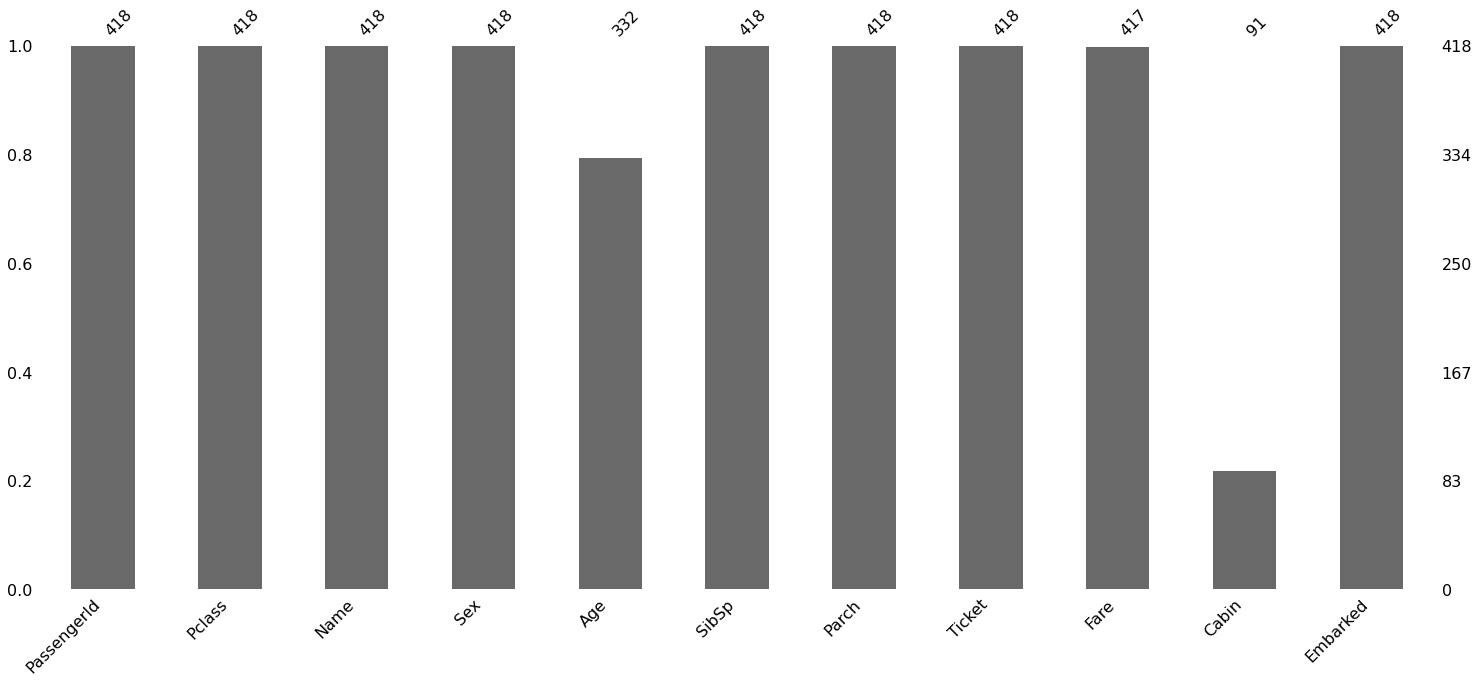

In [ ]:
msno.bar(df_test) 

In [ ]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


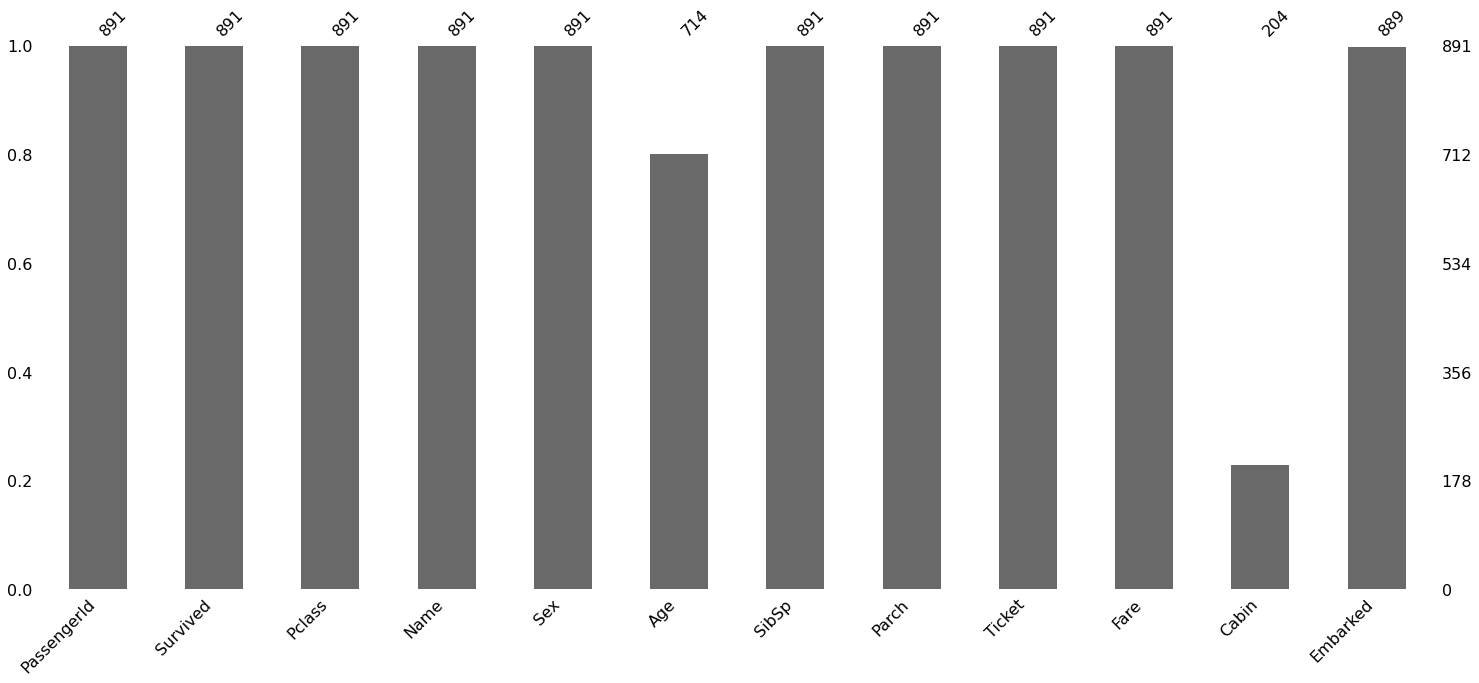

In [ ]:

msno.bar(df_train) 

Podemos ver que la variable de 'Cabin' cuenta con muchos valores nulos, por lo que podemos descartarla 

In [ ]:
df_train = df_train.drop(['Cabin'], axis = 1)
df_test = df_test.drop(['Cabin'], axis = 1)

Al tener Nan en 'Embarked', podemos sustituirlo por el mas comun 

In [ ]:
df_train[["Embarked", "PassengerId"]].groupby(['Embarked'], as_index=False).nunique()

,Embarked,PassengerId
0,C,168
1,Q,77
2,S,644


In [ ]:
df_train['Embarked'] = df_train['Embarked'].replace(np.nan, 'S')

Tenemos NaN en 'Age'

In [ ]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())

Tenemos NaN en 'Fare'

In [ ]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

In [ ]:
print(df_train.isna().sum())
print('-'*20)
print(df_test.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
--------------------
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Vemos la informacion de las variables numericas

In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Vemos las variables categoricas

In [ ]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,646


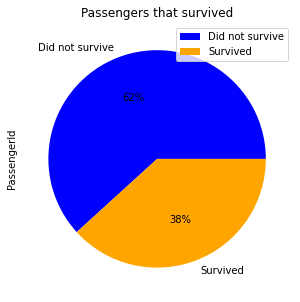

In [ ]:
labels = 'Did not survive' , 'Survived'
df_train.groupby(['Survived']).sum().plot(kind='pie', y = 'PassengerId', autopct='%1.0f%%',
                                colors = ['Blue', 'Orange'],
                                title='Passengers that survived', figsize = (5,5), labels = labels)

Sobrevivientes por diferentes categorias

In [ ]:
df_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
df_train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean()


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
df_train['Age'] = round(df_train['Age'])
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=list(range(0, 80, 10)))
df_train[["AgeGroup", "Survived"]].groupby(['AgeGroup'], as_index=False).mean()



,AgeGroup,Survived
0,"(0, 10]",0.587302
1,"(10, 20]",0.379310
2,"(20, 30]",0.333333
3,"(30, 40]",0.445161
4,"(40, 50]",0.392857
5,"(50, 60]",0.404762
6,"(60, 70]",0.222222


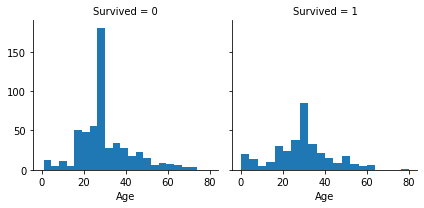

In [ ]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [ ]:
df_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
df_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [ ]:
df_train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


Combinando variables

In [ ]:
df_train['Total family'] = df_train['SibSp'] + df_train['Parch'] 
df_test['Total family'] = df_test['SibSp'] + df_test['Parch'] 
df_train[["Total family", "Survived"]].groupby(['Total family'], as_index=False).mean()

,Total family,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,10,0.000000


In [ ]:
df_train.groupby(['Sex','Pclass'])['Survived'].agg('mean')

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

Modelo

In [ ]:
df_train['Sex'].unique(), df_train['Embarked'].unique()

(array(['male', 'female'], dtype=object), array(['S', 'C', 'Q'], dtype=object))

In [ ]:
clean_cat = {"Sex":     {"male": 0, "female": 1},
                "Embarked": {"S": 2, "C": 1, "Q": 0}}
df_train = df_train.replace(clean_cat)
df_test = df_test.replace(clean_cat)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,Total family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2,"(20, 30]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,"(30, 40]",1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2,"(20, 30]",0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,"(30, 40]",1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2,"(30, 40]",0


In [ ]:
X_train = df_train.drop(["PassengerId","Survived",'SibSp',	'Parch',	'Ticket',	'Fare', 'AgeGroup','Name'], axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop(["PassengerId",'SibSp',	'Parch',	'Ticket',	'Fare', 'Name'], axis=1)



In [ ]:
from sklearn.metrics import SCORERS
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, Y_train)
Y_pred = decisionTree.predict(X_test)
score = round(decisionTree.score(X_train, Y_train) * 100, 2)
print('Decision Tree Classifier predicts with', score, '% of accuracy')

Decision Tree Classifier predicts with 93.04 % of accuracy


In [ ]:
df_test['Survived'] = Y_pred
df_test[['PassengerId', 'Survived']].head()

Final = df_test[['PassengerId', 'Survived']]
Final.to_csv('/content/drive/Shareddrives/IA Bloque 1/Final.csv', index = False)